<a href="https://colab.research.google.com/github/RosieNguyen98/Machine-learning/blob/main/Food_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Understand data**

In [ ]:
# Load data
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Python sample/ML/Food delivery/train.csv'
df = pd.read_csv(file_path)

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,3/19/2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,3/25/2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,3/19/2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,3/26/2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


**Data cleaning**

In [ ]:
# Xử lý column
df['Province_code'] = df['Delivery_person_ID'].str.split('RES').str[0]
df['Weather_conditions'] = df['Weatherconditions'].str.split(' ').str[1]
df['Time_taken'] = df['Time_taken(min)'].str.split(' ').str[1]
df.drop(columns=['ID', 'Delivery_person_ID', 'Weatherconditions','Time_taken(min)'], inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Province_code,Weather_conditions,Time_taken
0,37,4.9,22.745049,75.892471,22.765049,75.912471,3/19/2022,11:30:00,11:45:00,High,2,Snack,motorcycle,0,No,Urban,INDO,Sunny,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3/25/2022,19:45:00,19:50:00,Jam,2,Snack,scooter,1,No,Metropolitian,BANG,Stormy,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,3/19/2022,8:30:00,8:45:00,Low,0,Drinks,motorcycle,1,No,Urban,BANG,Sandstorms,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,Medium,0,Buffet,motorcycle,1,No,Metropolitian,COIMB,Sunny,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,3/26/2022,13:30:00,13:45:00,High,1,Snack,scooter,1,No,Metropolitian,CHEN,Cloudy,30


In [ ]:
# Change type data
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Time_taken'] = df['Time_taken'].astype(int)
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce').astype('Int32')
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce').astype('Int32')
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')
df.head()


<ipython-input-33-4f7796f84f63>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
<ipython-input-33-4f7796f84f63>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Province_code,Weather_conditions,Time_taken
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-06-25 11:30:00,2024-06-25 11:45:00,High,2,Snack,motorcycle,0,No,Urban,INDO,Sunny,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-06-25 19:45:00,2024-06-25 19:50:00,Jam,2,Snack,scooter,1,No,Metropolitian,BANG,Stormy,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-06-25 08:30:00,2024-06-25 08:45:00,Low,0,Drinks,motorcycle,1,No,Urban,BANG,Sandstorms,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2024-06-25 18:00:00,2024-06-25 18:10:00,Medium,0,Buffet,motorcycle,1,No,Metropolitian,COIMB,Sunny,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-06-25 13:30:00,2024-06-25 13:45:00,High,1,Snack,scooter,1,No,Metropolitian,CHEN,Cloudy,30


In [ ]:
# Kiểm tra duplicate
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [ ]:
#Check null values
df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
multiple_deliveries             993
Type_of_order                     0
Weather_conditions                0
Province_code                     0
City                              0
Festival                          0
Type_of_vehicle                   0
Road_traffic_density              0
Vehicle_condition                 0
Time_Order_picked                 0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken                        0
dtype: int64

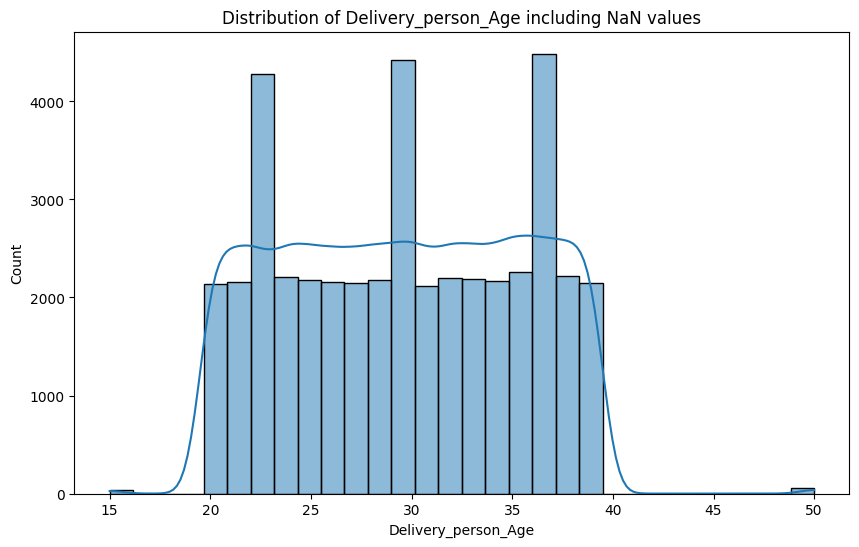

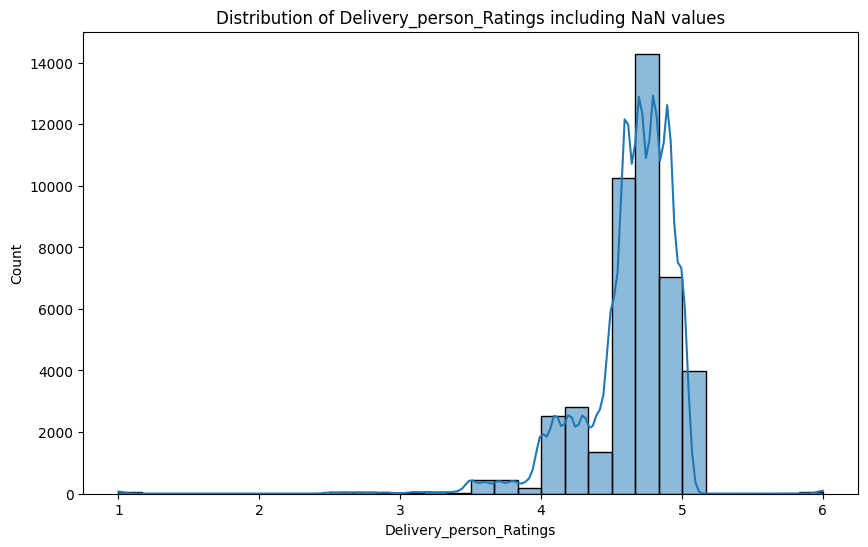

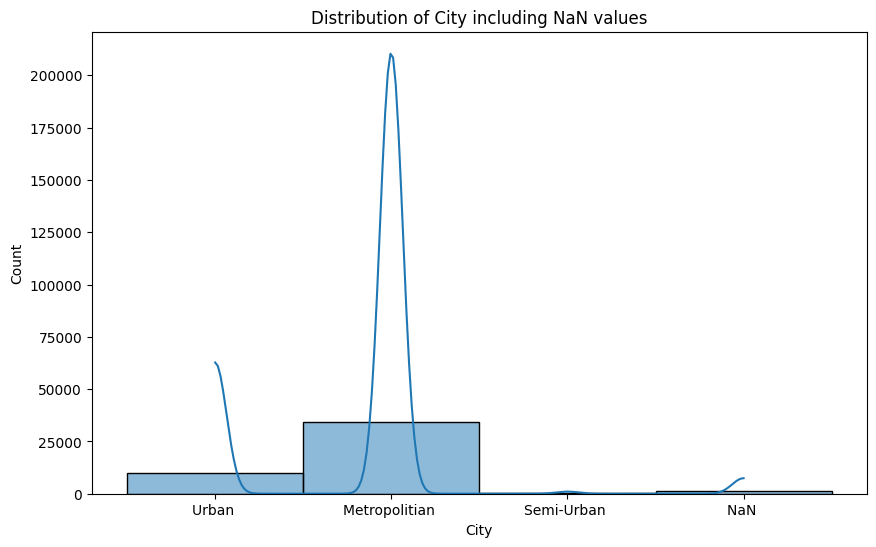

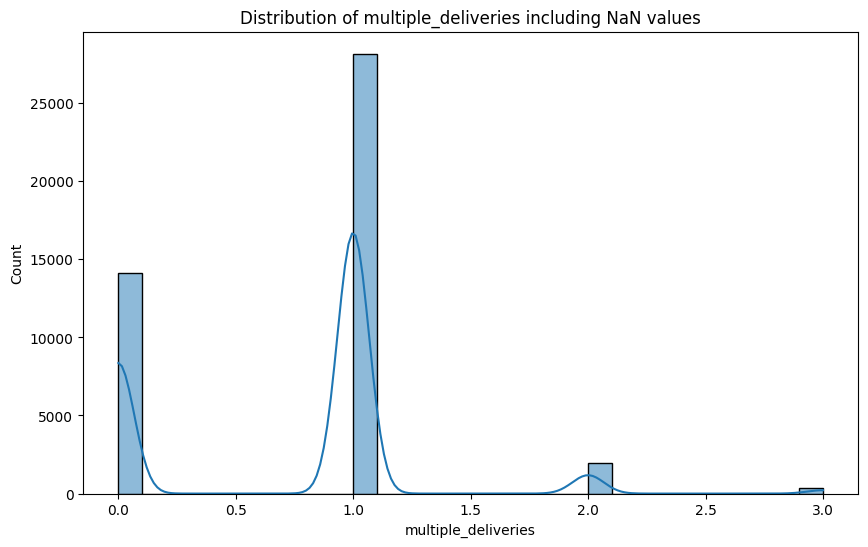

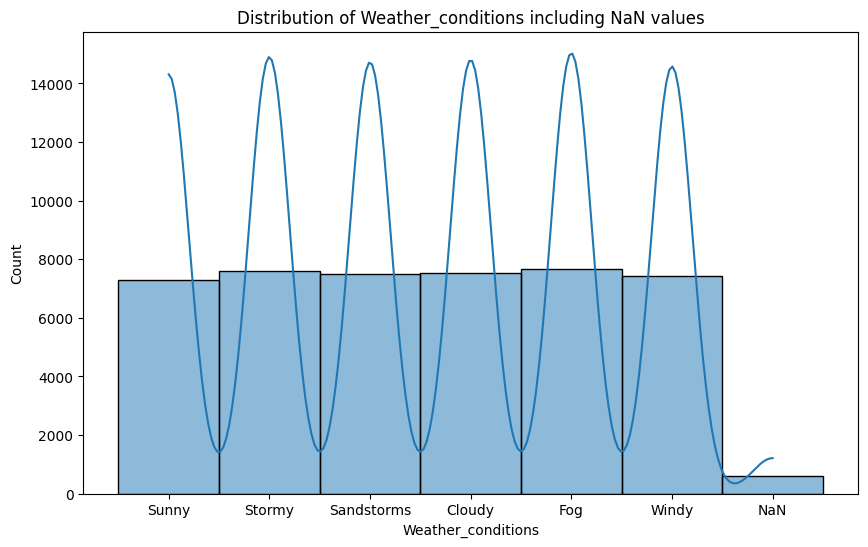

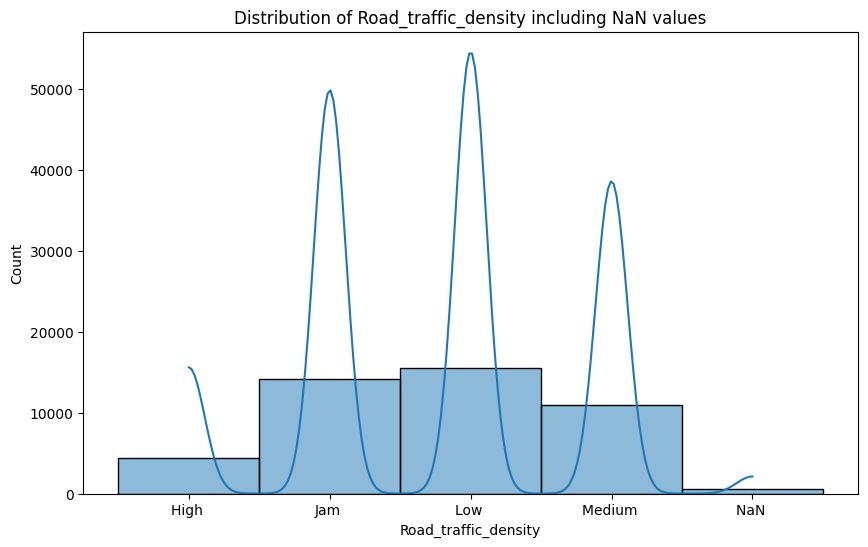

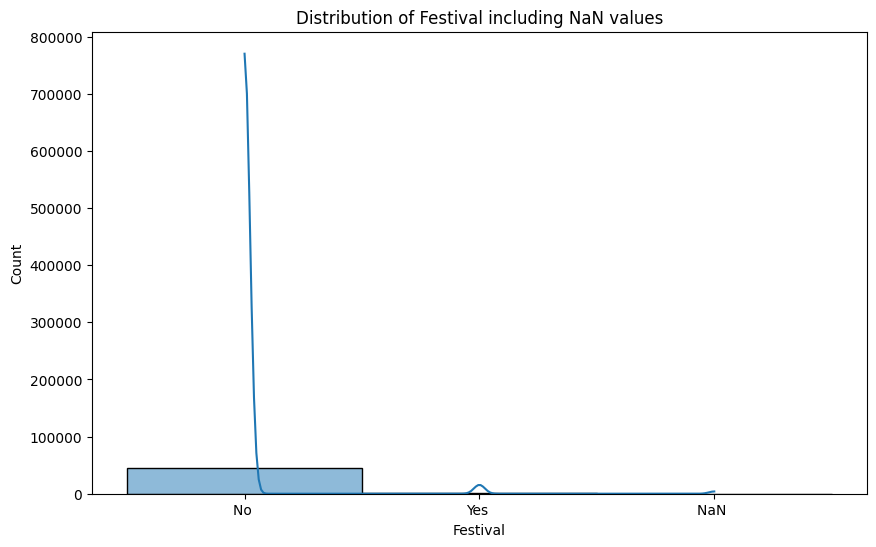

In [ ]:
# Khám phá column chứa null value
import matplotlib.pyplot as plt
import seaborn as sns
columns_with_nulls = ['Delivery_person_Age','Delivery_person_Ratings','City','multiple_deliveries','Weather_conditions','Road_traffic_density', 'Festival']
for column in columns_with_nulls:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column} including NaN values")
    plt.show()


In [ ]:
df_null = df[columns_with_nulls]
df_null.describe()


,Delivery_person_Age,Delivery_person_Ratings,multiple_deliveries
count,43739.0,43685.000000,44600.0
mean,29.567137,4.633780,0.744664
std,5.815155,0.334716,0.572473
min,15.0,1.000000,0.0
25%,25.0,4.500000,0.0
50%,30.0,4.700000,1.0
75%,35.0,4.900000,1.0
max,50.0,6.000000,3.0


In [ ]:
# Fill null value
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median(), inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
df['City'].fillna(df['City'].mode(), inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode(), inplace=True)
df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
df['Time_Orderd'].fillna(df['Time_Orderd'].median(), inplace=True)
df['Time_Order_picked'].fillna(df['Time_Order_picked'].median(), inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Province_code,Weather_conditions,Time_taken
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-06-25 11:30:00,2024-06-25 11:45:00,High,2,Snack,motorcycle,0,No,Urban,INDO,Sunny,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-06-25 19:45:00,2024-06-25 19:50:00,Jam,2,Snack,scooter,1,No,Metropolitian,BANG,Stormy,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-06-25 08:30:00,2024-06-25 08:45:00,Low,0,Drinks,motorcycle,1,No,Urban,BANG,Sandstorms,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2024-06-25 18:00:00,2024-06-25 18:10:00,Medium,0,Buffet,motorcycle,1,No,Metropolitian,COIMB,Sunny,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-06-25 13:30:00,2024-06-25 13:45:00,High,1,Snack,scooter,1,No,Metropolitian,CHEN,Cloudy,30


In [ ]:
# Thêm column day
df["day"] = df.Order_Date.dt.day
df["month"] = df.Order_Date.dt.month
df["quarter"] = df.Order_Date.dt.quarter
df["year"] = df.Order_Date.dt.year
df['day_of_week'] = df.Order_Date.dt.day_of_week.astype(int)
df["is_month_start"] = df.Order_Date.dt.is_month_start.astype(int)
df["is_month_end"] = df.Order_Date.dt.is_month_end.astype(int)
df["is_quarter_start"] = df.Order_Date.dt.is_quarter_start.astype(int)
df["is_quarter_end"] = df.Order_Date.dt.is_quarter_end.astype(int)
df["is_year_start"] = df.Order_Date.dt.is_year_start.astype(int)
df["is_year_end"] = df.Order_Date.dt.is_year_end.astype(int)
df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]),1,0)
df.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Road_traffic_density,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-06-25 11:30:00,2024-06-25 11:45:00,High,...,1,2022,5,0,0,0,0,0,0,1
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-06-25 19:45:00,2024-06-25 19:50:00,Jam,...,1,2022,4,0,0,0,0,0,0,0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-06-25 08:30:00,2024-06-25 08:45:00,Low,...,1,2022,5,0,0,0,0,0,0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2024-06-25 18:00:00,2024-06-25 18:10:00,Medium,...,2,2022,2,0,0,0,0,0,0,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-06-25 13:30:00,2024-06-25 13:45:00,High,...,1,2022,5,0,0,0,0,0,0,1


In [ ]:
# Change time data type
def time_to_minutes(time_stamp):
    return time_stamp.hour * 60 + time_stamp.minute

# Applying the function to the DataFrame
df['Time_Orderd_seconds'] = df['Time_Orderd'].apply(time_to_minutes)
df['Time_Order_picked_seconds'] = df['Time_Order_picked'].apply(time_to_minutes)
df['Time_distance'] = df['Time_Order_picked_seconds'] - df['Time_Orderd_seconds']
df.drop(columns=['Time_Orderd', 'Time_Order_picked', 'Order_Date', 'Time_Orderd_seconds', 'Time_Order_picked_seconds'], inplace=True)

df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_distance
0,37,4.9,22.745049,75.892471,22.765049,75.912471,High,2,Snack,motorcycle,...,2022,5,0,0,0,0,0,0,1,15
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Jam,2,Snack,scooter,...,2022,4,0,0,0,0,0,0,0,5
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Low,0,Drinks,motorcycle,...,2022,5,0,0,0,0,0,0,1,15
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Medium,0,Buffet,motorcycle,...,2022,2,0,0,0,0,0,0,0,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,High,1,Snack,scooter,...,2022,5,0,0,0,0,0,0,1,15


In [ ]:
pip install geopy


In [ ]:
# Tính distance
from geopy.distance import distance
def calculate_distance(row):
    point1 = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    point2 = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return distance(point1, point2).km

# Apply the function to each row in the DataFrame
df['distance'] = df.apply(calculate_distance, axis=1)
df.drop(columns=['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition'], inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Province_code,Weather_conditions,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_distance,distance
0,37,4.9,High,Snack,motorcycle,0,No,Urban,INDO,Sunny,...,5,0,0,0,0,0,0,1,15,3.020737
1,34,4.5,Jam,Snack,scooter,1,No,Metropolitian,BANG,Stormy,...,4,0,0,0,0,0,0,0,5,20.143737
2,23,4.4,Low,Drinks,motorcycle,1,No,Urban,BANG,Sandstorms,...,5,0,0,0,0,0,0,1,15,1.549693
3,38,4.7,Medium,Buffet,motorcycle,1,No,Metropolitian,COIMB,Sunny,...,2,0,0,0,0,0,0,0,10,7.774497
4,32,4.6,High,Snack,scooter,1,No,Metropolitian,CHEN,Cloudy,...,5,0,0,0,0,0,0,1,15,6.197898


**Model building**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [ ]:
# Split features and label
X = df.drop('Time_taken', axis=1)  # Features
y = df['Time_taken']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 24)
(36474,)
(9119, 24)
(9119,)


In [ ]:
# Preprocessing pipelines for numerical and categorical features
numerical_features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries',
                      'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_start',
                      'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend', 'distance']
categorical_features = ['Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
                        'City', 'Province_code', 'Weather_conditions']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
# Lựa chọn best model
def evaluate_model_with_gridsearch(model, param_grid, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return grid_search.best_params_, mse, r2


In [ ]:
# Linear Regression
model = LinearRegression()
param_grid = {}
best_params, mse, r2 = evaluate_model_with_gridsearch(model, param_grid, X_train, X_test, y_train, y_test)
print(f"LinearRegression - Best Params: {best_params}, MSE: {mse:.4f}, R2: {r2:.4f}")


LinearRegression - Best Params: {}, MSE: 40.3387, R2: 0.5399


In [ ]:
# Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
param_grid = {'model__max_depth': [3, 5, 7]}
best_params, mse, r2 = evaluate_model_with_gridsearch(model, param_grid, X_train, X_test, y_train, y_test)
print(f"DecisionTreeRegressor - Best Params: {best_params}, MSE: {mse:.4f}, R2: {r2:.4f}")


DecisionTreeRegressor - Best Params: {'model__max_depth': 7}, MSE: 30.1713, R2: 0.6559


In [ ]:
# XGBoost Regressor
model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'model__n_estimators': [200],
    'model__max_depth': [8],
    'model__learning_rate': [0.05],
    # 'model__subsample': [0.8]
    'model__colsample_bytree': [0.7]
    # 'model__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}
best_params, mse, r2 = evaluate_model_with_gridsearch(model, param_grid, X_train, X_test, y_train, y_test)
print(f"XGBRegressor - Best Params: {best_params}, R2: {r2:.4f}")


XGBRegressor - Best Params: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.05, 'model__max_depth': 8, 'model__n_estimators': 200}, R2: 0.7789


In [ ]:
# Preprocess the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Create an XGB regressor model
model = xgb.XGBRegressor(n_estimators=200, max_depth=8, learning_rate=0.05, colsample_bytree=0.7)

# Fit the model on the transformed training data
model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_transformed)

# Print predictions (or any other evaluation metrics)
print(y_pred)


[44.920826 45.312664 36.436764 ... 23.231817 27.841885 27.103226]


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.47
Mean Squared Error (MSE): 19.51
Root Mean Squared Error (RMSE): 4.42
R-squared (R2) Score: 0.78


**Test prediction**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file from Google Drive
file_path = '/content/drive/My Drive/Python sample/ML/Food delivery/test.csv'
df_test = pd.read_csv(file_path)

# Xử lý data test
df_test['Province_code'] = df_test['Delivery_person_ID'].str.split('RES').str[0]
df_test['Weather_conditions'] = df_test['Weatherconditions'].str.split(' ').str[1]
df_test.drop(columns=['ID', 'Delivery_person_ID', 'Weatherconditions'], inplace=True)
df_test['Order_Date'] = pd.to_datetime(df_test['Order_Date'])
df_test['Delivery_person_Age'] = pd.to_numeric(df_test['Delivery_person_Age'], errors='coerce').astype('Int32')
df_test['Delivery_person_Ratings'] = df_test['Delivery_person_Ratings'].astype(float)
df_test['multiple_deliveries'] = pd.to_numeric(df_test['multiple_deliveries'], errors='coerce').astype('Int32')
df_test['Time_Orderd'] = pd.to_datetime(df_test['Time_Orderd'], errors='coerce')
df_test['Time_Order_picked'] = pd.to_datetime(df_test['Time_Order_picked'], errors='coerce')

df_test["day"] = df_test.Order_Date.dt.day
df_test["month"] = df_test.Order_Date.dt.month
df_test["quarter"] = df_test.Order_Date.dt.quarter
df_test["year"] = df_test.Order_Date.dt.year
df_test['day_of_week'] = df_test.Order_Date.dt.day_of_week.astype(int)
df_test["is_month_start"] = df_test.Order_Date.dt.is_month_start.astype(int)
df_test["is_month_end"] = df_test.Order_Date.dt.is_month_end.astype(int)
df_test["is_quarter_start"] = df_test.Order_Date.dt.is_quarter_start.astype(int)
df_test["is_quarter_end"] = df_test.Order_Date.dt.is_quarter_end.astype(int)
df_test["is_year_start"] = df_test.Order_Date.dt.is_year_start.astype(int)
df_test["is_year_end"] = df_test.Order_Date.dt.is_year_end.astype(int)
df_test['is_weekend'] = np.where(df_test['day_of_week'].isin([5,6]),1,0)

def time_to_minutes(time_stamp):
    return time_stamp.hour * 60 + time_stamp.minute
df_test['Time_Orderd_seconds'] = df_test['Time_Orderd'].apply(time_to_minutes)
df_test['Time_Order_picked_seconds'] = df_test['Time_Order_picked'].apply(time_to_minutes)
df_test['Time_distance'] = df_test['Time_Order_picked_seconds'] - df_test['Time_Orderd_seconds']
df_test.drop(columns=['Time_Orderd', 'Time_Order_picked', 'Order_Date', 'Time_Orderd_seconds', 'Time_Order_picked_seconds'], inplace=True)

from geopy.distance import distance
def calculate_distance(row):
    point1 = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    point2 = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return distance(point1, point2).km

# Apply the function to each row in the DataFrame
df_test['distance'] = df_test.apply(calculate_distance, axis=1)
df_test.drop(columns=['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition'], inplace=True)

# Display the first few rows of the dataframe
df_test.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-100-54d5e8cab64f>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test['Order_Date'] = pd.to_datetime(df_test['Order_Date'])
<ipython-input-100-54d5e8cab64f>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Time_Orderd'] = pd.to_datetime(df_test['Time_Orderd'], errors='coerce')
<ipython-input-100-54d5e8cab64f>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Time_Order_picked'] = pd.to_datetime(df_test['Time_Order_picked'], errors='coerce')


,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Province_code,Weather_conditions,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_distance,distance
0,<NA>,NaN,NaN,Drinks,electric_scooter,1,No,Metropolitian,COIMB,NaN,...,2,0,0,0,0,0,0,0,NaN,6.219648
1,28,4.6,Jam,Snack,motorcycle,1,No,Metropolitian,BANG,Windy,...,1,0,0,0,0,0,0,0,5.0,17.042985
2,23,4.5,Jam,Drinks,motorcycle,1,No,Metropolitian,JAP,Stormy,...,3,0,0,0,0,0,0,0,10.0,13.390474
3,21,4.8,Medium,Meal,scooter,1,No,Metropolitian,JAP,Fog,...,5,0,0,0,0,0,0,1,5.0,13.397932
4,31,4.6,Medium,Drinks,scooter,1,No,Metropolitian,CHEN,Sunny,...,6,0,0,0,0,0,0,1,15.0,17.042634


In [ ]:
df_test_transform = preprocessor.transform(df_test)

# Make predictions using the trained XGBoost model
predictions = model.predict(df_test_transform)

# Tạo DataFrame mới kết hợp dữ liệu đầu vào và giá trị dự báo
df_results = df_test.copy()  # Sao chép dữ liệu gốc
df_results['Predicted_Time_taken'] = predictions  # Thêm cột dự đoán

df_results.head()


,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Province_code,Weather_conditions,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_distance,distance,Predicted_Time_taken
0,<NA>,NaN,NaN,Drinks,electric_scooter,1,No,Metropolitian,COIMB,NaN,...,0,0,0,0,0,0,0,NaN,6.219648,21.826128
1,28,4.6,Jam,Snack,motorcycle,1,No,Metropolitian,BANG,Windy,...,0,0,0,0,0,0,0,5.0,17.042985,26.887972
2,23,4.5,Jam,Drinks,motorcycle,1,No,Metropolitian,JAP,Stormy,...,0,0,0,0,0,0,0,10.0,13.390474,25.622360
3,21,4.8,Medium,Meal,scooter,1,No,Metropolitian,JAP,Fog,...,0,0,0,0,0,0,1,5.0,13.397932,31.049675
4,31,4.6,Medium,Drinks,scooter,1,No,Metropolitian,CHEN,Sunny,...,0,0,0,0,0,0,1,15.0,17.042634,22.454975
